In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as sps
import json
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

url = "http://api.openweathermap.org/data/2.5/weather?"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
# Print the city count to confirm sufficient count
len(cities)

625

In [3]:
cities_df = pd.DataFrame(data=cities)
cities_df["City"] = cities
cities_df["Country"] = countries
cities_df = cities_df.drop([0], axis = 1)
cities_df = cities_df.drop_duplicates()
cities_df

,City,Country
0,rikitea,pf
1,nikolskoye,ru
2,atuona,pf
3,punta arenas,cl
4,bontang,id
...,...,...
620,haibowan,cn
621,tumannyy,ru
622,berlevag,no
623,fort frances,ca


In [4]:
all_cities = []
all_countries = []
lats = []
lons = []
max_temps = []
humidities = []
clouds = []
wind_speeds = []
dates = []


for index, row in cities_df.iterrows():
     
        try:
            city = row["City"]
            country = row["Country"]
            city_num = index +1
            query_url = f"{url}q={city}&{country}&appid={api_key}"
            current_weather = requests.get(query_url)
            weather_json = current_weather.json()
            
            lat = weather_json["coord"]["lat"]   
            lon = weather_json["coord"]["lon"] 
            k_temp = weather_json["main"]["temp_max"] 
            max_temp = (k_temp - 273.15) * 9/5 + 32          
            humidity = weather_json["main"]["humidity"]
            cloudiness = weather_json["clouds"]["all"]
            wind_speed = weather_json["wind"]["speed"] 
            date = weather_json["dt"]
            
            lats.append(lat)
            lons.append(lon)
            max_temps.append(max_temp)
            humidities.append(humidity)
            clouds.append(cloudiness)
            wind_speeds.append(wind_speed)
            dates.append(date)
            all_cities.append(city)
            all_countries.append(country)            
         
            print(f"Retrieving Results for city #{city_num} : {city}, {country}")
        except:
            print("unable to locate city. skipping...")

Retrieving Results for city #1 : rikitea, pf
Retrieving Results for city #2 : nikolskoye, ru
Retrieving Results for city #3 : atuona, pf
Retrieving Results for city #4 : punta arenas, cl
Retrieving Results for city #5 : bontang, id
unable to locate city. skipping...
Retrieving Results for city #7 : urusha, ru
Retrieving Results for city #8 : jamestown, sh
Retrieving Results for city #9 : birjand, ir
Retrieving Results for city #10 : nioaque, br
Retrieving Results for city #11 : new norfolk, au
Retrieving Results for city #12 : souillac, mu
Retrieving Results for city #13 : matay, eg
Retrieving Results for city #14 : fortuna, us
Retrieving Results for city #15 : yellowknife, ca
Retrieving Results for city #16 : raudeberg, no
Retrieving Results for city #17 : olafsvik, is
Retrieving Results for city #18 : dickinson, us
Retrieving Results for city #19 : mataura, pf
Retrieving Results for city #20 : miri, my
Retrieving Results for city #21 : busselton, au
Retrieving Results for city #22 : 

Retrieving Results for city #177 : ati, td
Retrieving Results for city #178 : sao filipe, cv
Retrieving Results for city #179 : khatanga, ru
Retrieving Results for city #180 : bengkulu, id
Retrieving Results for city #181 : hailar, cn
Retrieving Results for city #182 : destin, us
Retrieving Results for city #183 : pergamino, ar
Retrieving Results for city #184 : coahuayana, mx
unable to locate city. skipping...
Retrieving Results for city #186 : saint-augustin, ca
Retrieving Results for city #187 : te anau, nz
Retrieving Results for city #188 : saskylakh, ru
Retrieving Results for city #189 : port elizabeth, za
Retrieving Results for city #190 : whitehorse, ca
Retrieving Results for city #191 : calatayud, es
Retrieving Results for city #192 : lasa, cn
Retrieving Results for city #193 : henties bay, na
Retrieving Results for city #194 : cherskiy, ru
Retrieving Results for city #195 : ponta delgada, pt
Retrieving Results for city #196 : cidreira, br
Retrieving Results for city #197 : pou

Retrieving Results for city #351 : cabra, ph
unable to locate city. skipping...
Retrieving Results for city #353 : slave lake, ca
Retrieving Results for city #354 : charagua, bo
Retrieving Results for city #355 : meadow lake, ca
Retrieving Results for city #356 : cananeia, br
Retrieving Results for city #357 : robertson, za
Retrieving Results for city #358 : nynashamn, se
Retrieving Results for city #359 : kumano, jp
Retrieving Results for city #360 : namibe, ao
Retrieving Results for city #361 : islamkot, pk
Retrieving Results for city #362 : ostrovnoy, ru
Retrieving Results for city #363 : carmen, cr
Retrieving Results for city #364 : lac du bonnet, ca
Retrieving Results for city #365 : price, us
Retrieving Results for city #366 : port hardy, ca
Retrieving Results for city #367 : lompoc, us
Retrieving Results for city #368 : mokhsogollokh, ru
Retrieving Results for city #369 : omagari, jp
Retrieving Results for city #370 : caravelas, br
Retrieving Results for city #371 : hasaki, jp
R

Retrieving Results for city #529 : gondanglegi, id
Retrieving Results for city #530 : avanigadda, in
Retrieving Results for city #531 : shalazhi, ru
unable to locate city. skipping...
Retrieving Results for city #533 : port hawkesbury, ca
Retrieving Results for city #534 : baturaja, id
Retrieving Results for city #535 : turukhansk, ru
Retrieving Results for city #536 : morant bay, jm
Retrieving Results for city #537 : aracati, br
Retrieving Results for city #538 : ilhabela, br
Retrieving Results for city #539 : kerouane, gn
Retrieving Results for city #540 : chenzhou, cn
Retrieving Results for city #541 : fuengirola, es
Retrieving Results for city #542 : strezhevoy, ru
Retrieving Results for city #543 : agutaya, ph
Retrieving Results for city #544 : astara, az
Retrieving Results for city #545 : westport, nz
Retrieving Results for city #546 : qiongshan, cn
Retrieving Results for city #547 : antofagasta, cl
Retrieving Results for city #548 : ballarat, au
Retrieving Results for city #549 

In [5]:
weather_frame = pd.DataFrame(list(zip(all_cities, all_countries, lats, lons, max_temps, humidities,clouds,wind_speeds,dates)),
               columns =["city", "country", "lat", "lng", "max_temp", "humidity", "cloudiness", "wind_speed", "date"])
weather_frame

,city,country,lat,lng,max_temp,humidity,cloudiness,wind_speed,date
0,rikitea,pf,-23.12,-134.97,73.292,89,89,6.99,1596555059
1,nikolskoye,ru,59.70,30.79,69.800,77,20,2.00,1596555079
2,atuona,pf,-9.80,-139.03,78.278,70,1,8.81,1596555077
3,punta arenas,cl,-53.15,-70.92,42.800,52,75,7.70,1596555073
4,bontang,id,0.13,117.50,77.342,88,100,1.97,1596555020
...,...,...,...,...,...,...,...,...,...
557,dubti,et,11.74,41.09,89.762,45,82,0.41,1596555253
558,atyrau,kz,47.12,51.88,62.600,88,75,6.00,1596555253
559,berlevag,no,70.86,29.09,64.400,82,84,3.10,1596555254
560,fort frances,ca,48.60,-93.40,66.002,63,1,3.10,1596555131


In [6]:
weather_frame.to_csv("output_data/weather_csv", index=None)

In [7]:
weather_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        562 non-null    object 
 1   country     562 non-null    object 
 2   lat         562 non-null    float64
 3   lng         562 non-null    float64
 4   max_temp    562 non-null    float64
 5   humidity    562 non-null    int64  
 6   cloudiness  562 non-null    int64  
 7   wind_speed  562 non-null    float64
 8   date        562 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 39.6+ KB


In [8]:
weather_frame["humidity"].sort_values(ascending=False)

140    100
413    100
82     100
416    100
265    100
      ... 
245      7
214      7
366      5
545      3
494      2
Name: humidity, Length: 562, dtype: int64

Text(0.5, 1.0, 'lattitude vs max temp')

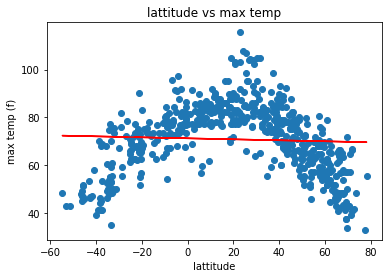

In [9]:
the_lats = weather_frame["lat"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(the_lats, max_temps)
regress_values = the_lats * slope + intercept
#line_eq = "y = " + str(round(slope, 2)) + str(round(the_lats, 2)) = str(round(intercept, 2))
plt.scatter(the_lats, max_temps)
plt.plot(lats, regress_values, "r-")
#plt.legend(line_eq)
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title("lattitude vs max temp")


Text(0.5, 1.0, 'lattitude vs max temp')

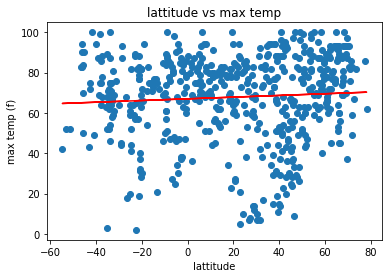

In [10]:
the_lats = weather_frame["lat"]
(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(lats, humidities)
regress_values = the_lats * slope + intercept

plt.scatter(lats, humidities)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title("lattitude vs max temp")
#plt.legend(line_eq)

Text(0.5, 1.0, 'lattitude vs max temp')

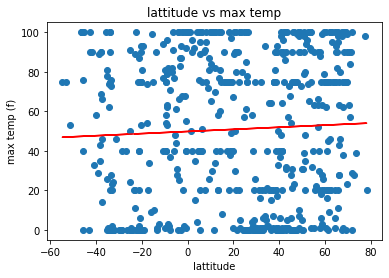

In [11]:
(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(the_lats, clouds)
regress_values = the_lats * slope + intercept

plt.scatter(lats, clouds)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title("lattitude vs max temp")
#plt.legend(line_eq)

Text(0.5, 1.0, 'lattitude vs max temp')

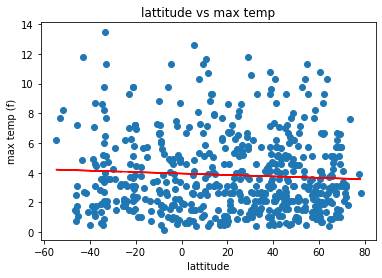

In [12]:
(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(the_lats, wind_speeds)
regress_values = the_lats * slope + intercept

plt.scatter(lats, wind_speeds)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title("lattitude vs max temp")
#plt.legend(line_eq)

In [13]:
northern_df = weather_frame[weather_frame["lat"] > 0]
northern_df

,city,country,lat,lng,max_temp,humidity,cloudiness,wind_speed,date
1,nikolskoye,ru,59.70,30.79,69.800,77,20,2.00,1596555079
4,bontang,id,0.13,117.50,77.342,88,100,1.97,1596555020
5,urusha,ru,54.05,122.90,55.130,97,100,1.52,1596555140
6,jamestown,sh,42.10,-79.24,66.992,93,75,1.50,1596555058
7,birjand,ir,32.87,59.22,84.200,17,0,9.30,1596555140
...,...,...,...,...,...,...,...,...,...
556,sioux lookout,ca,50.10,-91.92,64.400,52,5,1.00,1596555253
557,dubti,et,11.74,41.09,89.762,45,82,0.41,1596555253
558,atyrau,kz,47.12,51.88,62.600,88,75,6.00,1596555253
559,berlevag,no,70.86,29.09,64.400,82,84,3.10,1596555254


In [14]:
southern_df = weather_frame[weather_frame["lat"] < 0]
southern_df

,city,country,lat,lng,max_temp,humidity,cloudiness,wind_speed,date
0,rikitea,pf,-23.12,-134.97,73.292,89,89,6.99,1596555059
2,atuona,pf,-9.80,-139.03,78.278,70,1,8.81,1596555077
3,punta arenas,cl,-53.15,-70.92,42.800,52,75,7.70,1596555073
8,nioaque,br,-21.14,-55.83,90.122,19,0,3.66,1596555140
9,new norfolk,au,-42.78,147.06,46.004,72,100,2.68,1596555070
...,...,...,...,...,...,...,...,...,...
546,talara,pe,-4.58,-81.27,68.000,68,31,11.30,1596555251
553,rio grande,br,-32.03,-52.10,73.400,69,0,3.60,1596555118
554,varzea alegre,br,-5.35,-40.38,91.598,25,48,4.95,1596555252
555,daru,pg,-9.08,143.21,75.974,88,96,6.01,1596555253


Text(0.5, 1.0, 'lattitude vs max temp')

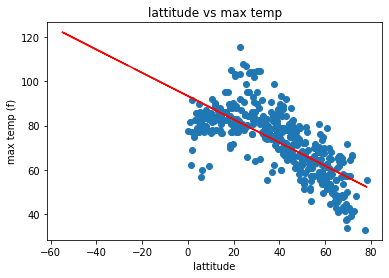

In [15]:
north_lats = northern_df["lat"]
north_temps = northern_df["max_temp"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(north_lats, north_temps)
regress_values = the_lats * slope + intercept
#line_eq = "y = " + str(round(slope, 2)) + str(round(the_lats, 2)) = str(round(intercept, 2))
plt.scatter(north_lats, north_temps)
plt.plot(lats, regress_values, "r-")
#plt.legend(line_eq)
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title("lattitude vs max temp")


Text(0.5, 1.0, 'lattitude vs max temp')

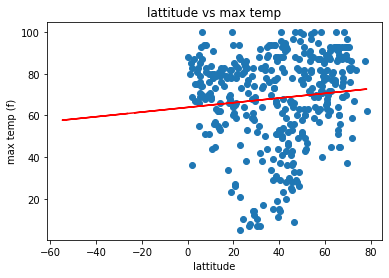

In [16]:
north_humidities = northern_df["humidity"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(north_lats, north_humidities)
regress_values = the_lats * slope + intercept
#line_eq = "y = " + str(round(slope, 2)) + str(round(the_lats, 2)) = str(round(intercept, 2))
plt.scatter(north_lats, north_humidities)
plt.plot(lats, regress_values, "r-")
#plt.legend(line_eq)
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title("lattitude vs max temp")


Text(0.5, 1.0, 'lattitude vs max temp')

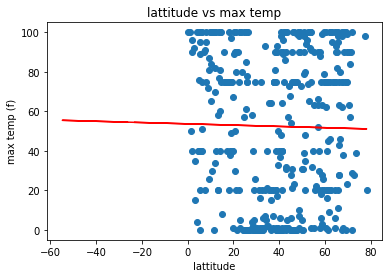

In [17]:
north_clouds = northern_df["cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(north_lats, north_clouds)
regress_values = the_lats * slope + intercept
#line_eq = "y = " + str(round(slope, 2)) + str(round(the_lats, 2)) = str(round(intercept, 2))
plt.scatter(north_lats, north_clouds)
plt.plot(lats, regress_values, "r-")
#plt.legend(line_eq)
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title("lattitude vs max temp")


Text(0.5, 1.0, 'lattitude vs max temp')

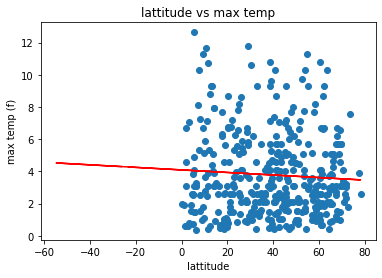

In [18]:
north_speeds = northern_df["wind_speed"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(north_lats, north_speeds)
regress_values = the_lats * slope + intercept
#line_eq = "y = " + str(round(slope, 2)) + str(round(the_lats, 2)) = str(round(intercept, 2))
plt.scatter(north_lats, north_speeds)
plt.plot(lats, regress_values, "r-")
#plt.legend(line_eq)
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title("lattitude vs max temp")


Text(0.5, 1.0, 'lattitude vs max temp')

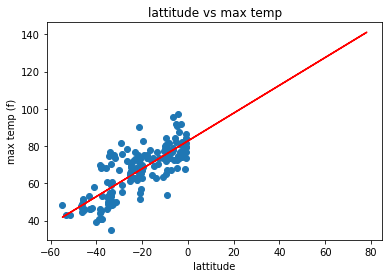

In [20]:
south_lats = southern_df["lat"]
south_temps = southern_df["max_temp"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(south_lats, south_temps)
regress_values = the_lats * slope + intercept
#line_eq = "y = " + str(round(slope, 2)) *  str(round(the_lats, 2)) = str(round(intercept, 2))
plt.scatter(south_lats, south_temps)
plt.plot(lats, regress_values, "r-")
#plt.legend(line_eq)
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title("lattitude vs max temp")

Text(0.5, 1.0, 'lattitude vs max temp')

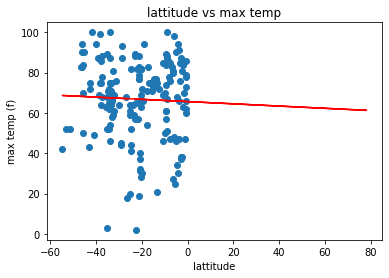

In [21]:
south_humidities = southern_df["humidity"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(south_lats, south_humidities)
regress_values = the_lats * slope + intercept
#line_eq = "y = " + str(round(slope, 2)) + str(round(the_lats, 2)) = str(round(intercept, 2))
plt.scatter(south_lats, south_humidities)
plt.plot(lats, regress_values, "r-")
#plt.legend(line_eq)
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title("lattitude vs max temp")

Text(0.5, 1.0, 'lattitude vs max temp')

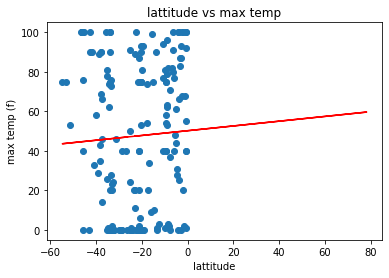

In [22]:
south_clouds = southern_df["cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(south_lats, south_clouds)
regress_values = the_lats * slope + intercept
#line_eq = "y = " + str(round(slope, 2)) + str(round(the_lats, 2)) = str(round(intercept, 2))
plt.scatter(south_lats, south_clouds)
plt.plot(lats, regress_values, "r-")
#plt.legend(line_eq)
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title("lattitude vs max temp")

Text(0.5, 1.0, 'lattitude vs max temp')

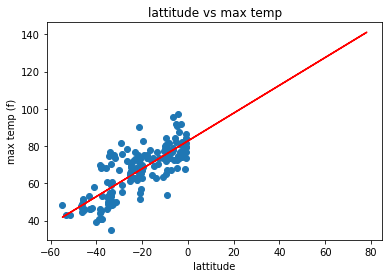

In [23]:
south_speeds = southern_df["wind_speed"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(south_lats, south_temps)
regress_values = the_lats * slope + intercept
#line_eq = "y = " + str(round(slope, 2)) + str(round(the_lats, 2)) = str(round(intercept, 2))
plt.scatter(south_lats, south_temps)
plt.plot(lats, regress_values, "r-")
#plt.legend(line_eq)
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title("lattitude vs max temp")